In [2]:
!pip install easyfsl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.8/72.8 kB 2.3 MB/s eta 0:00:00


Using QAT device: cuda
Using final evaluation device: cpu
Loading Omniglot dataset...
Setting up data loaders...
Data loading complete.
Pre-trained FSL weights file found: ./models_matching/resnet18_with_pretraining.tar

--- Evaluating Original FP32 Matching Networks Model (Reference) ---

--- Creating Matching Networks  ---
Creating standard ResNet18 backbone...
Creating MatchingNetworks model (feature_dim=512)...
Loading state dict from: ./models_matching/resnet18_with_pretraining.tar
Attempting to load state dict into MatchingNetworks model (strict=False)...
Load results - Missing keys: 12, Unexpected keys: 0
Weights loaded into Matching Networks structure (strict=False).


<ipython-input-5-87fa54d14d3c>:204: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(weights_path, map_location='cpu')


Model moved to cuda.


FP32 Reference Eval: 100%|██████████| 500/500 [00:18<00:00, 26.76it/s, acc=93.95%]


FP32 Reference Eval complete. Accuracy: 93.95% (23487/25000) on cuda

--- Creating Matching Networks with QAT-prepared backbone ---
Creating quantization-ready ResNet18 backbone (quantize=False)...
Preparing backbone for QAT...
Applied default QAT qconfig for backend fbgemm to backbone.
Backbone prepared for QAT.
Creating MatchingNetworks model (feature_dim=512)...


/usr/local/lib/python3.10/dist-packages/torch/ao/quantization/observer.py:229: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(


Loading state dict from: ./models_matching/resnet18_with_pretraining.tar
Attempting to load state dict into MatchingNetworks model (strict=False)...
Load results - Missing keys: 564, Unexpected keys: 0
Weights loaded into Matching Networks structure (strict=False).
Model moved to cuda.

--- Starting Quantization Aware Training (Fine-tuning) ---


QAT Training: 100%|██████████| 1000/1000 [01:15<00:00, 13.24it/s, loss=0.2959]


QAT Fine-tuning finished.

--- Evaluating QAT Model (Before Conversion) ---


QAT Pre-Conversion Eval: 100%|██████████| 500/500 [00:21<00:00, 23.06it/s, acc=98.03%]


QAT Pre-Conversion Eval complete. Accuracy: 98.03% (24507/25000) on cuda

--- Saving QAT model state to ./models_matching/qat_matching_model_state_1743855194.pth ---
QAT model state saved.

--- Converting Backbone to Final Quantized INT8 Format ---

--- Creating Matching Networks with QAT-prepared backbone ---
Creating quantization-ready ResNet18 backbone (quantize=False)...
Preparing backbone for QAT...
Applied default QAT qconfig for backend fbgemm to backbone.
Backbone prepared for QAT.
Creating MatchingNetworks model (feature_dim=512)...
No weights path provided. Model using backbone's initial weights.
Model moved to cpu.
Loading saved QAT state from: ./models_matching/qat_matching_model_state_1743855194.pth
QAT state loaded successfully into conversion model.
Applying torch.quantization.convert to the backbone...


<ipython-input-5-87fa54d14d3c>:331: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_to_convert.load_state_dict(torch.load(QAT_MODEL_STATE_DICT_FILENAME, map_location='cp

Backbone successfully converted to INT8 within the model.

--- Saving final model state dict (INT8 backbone) to ./models_matching/final_int8_matching_model_state_1743855194.pth ---
Final model state dict (with INT8 backbone) saved.

--- Evaluating Final Model (INT8 Backbone) ---


Final Eval (INT8 Backbone): 100%|██████████| 500/500 [01:13<00:00,  6.79it/s, acc=98.07%]


Final Eval (INT8 Backbone) complete. Accuracy: 98.07% (24518/25000) on cpu

--- Example: How to load and use the final model (INT8 backbone) later ---
Creating base structure with QAT-prepared backbone (on CPU)...

--- Creating Matching Networks with QAT-prepared backbone ---
Creating quantization-ready ResNet18 backbone (quantize=False)...
Preparing backbone for QAT...
Applied default QAT qconfig for backend fbgemm to backbone.
Backbone prepared for QAT.
Creating MatchingNetworks model (feature_dim=512)...
No weights path provided. Model using backbone's initial weights.
Model moved to cpu.
Converting empty backbone structure to INT8...


/usr/local/lib/python3.10/dist-packages/torch/ao/quantization/utils.py:407: UserWarning: must run observer before calling calculate_qparams. Returning default values.
  warnings.warn(
<ipython-input-5-87fa54d14d3c>:384: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded

Loading saved final state from: ./models_matching/final_int8_matching_model_state_1743855194.pth
Final state (with INT8 backbone) loaded.


Reloaded Final Eval (INT8 Backbone): 100%|██████████| 500/500 [01:14<00:00,  6.75it/s, acc=98.09%]


Reloaded Final Eval (INT8 Backbone) complete. Accuracy: 98.09% (24522/25000) on cpu

Script finished successfully.

--- Generating Plots ---
Accuracy comparison plot saved to ./graphs_matching/accuracy_comparison_matching_qat_backbone.png


ValueError: x and y must have same first dimension, but have shapes (951,) and (1,)

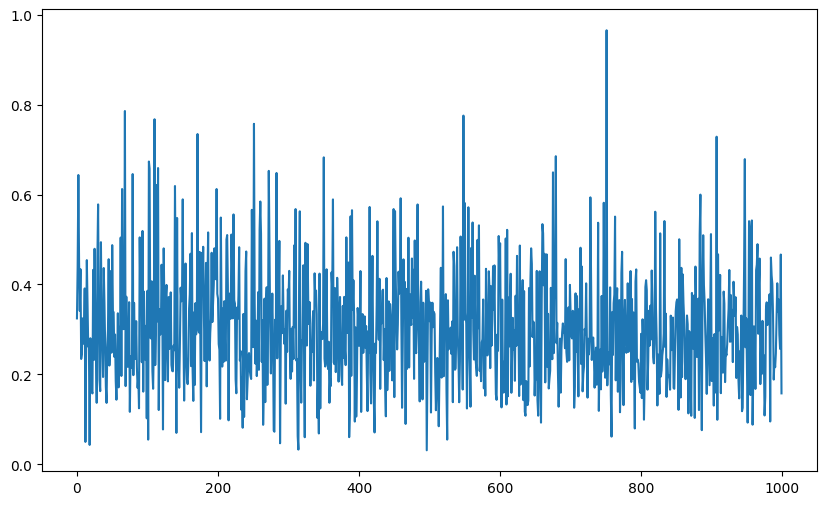

In [5]:
# -*- coding: utf-8 -*-
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import Omniglot
# Use standard resnet18 for FP32 reference evaluation
from torchvision.models import resnet18 as standard_resnet18
# Use the quantization-aware version for the QAT process
from torchvision.models.quantization import resnet18 as quantized_resnet18
from tqdm import tqdm
import copy
import os
import subprocess
import time
import warnings

# Import quantization modules
import torch.quantization
from torch.nn.quantized import FloatFunctional

# Import EasyFSL components
try:
    from easyfsl.samplers import TaskSampler
    from easyfsl.methods import MatchingNetworks
    from easyfsl.utils import sliding_average
except ImportError:
    print("EasyFSL not found. Please install it: pip install easyfsl")
    exit()

# --- Plotting Libraries ---
import matplotlib.pyplot as plt

# --- Configuration ---
# (Keep configuration the same as before)
SEED = 0
IMAGE_SIZE = 28
N_WAY = 5
N_SHOT = 5
N_QUERY = 10
N_TRAINING_EPISODES = 1000 # Reduced for faster demo
N_EVALUATION_TASKS = 500
LEARNING_RATE = 1e-5
LOG_UPDATE_FREQUENCY = 50
MODEL_DIR = "./models_matching"
GRAPHS_DIR = "./graphs_matching"
# --- Adjusted filenames slightly for clarity ---
QAT_MODEL_STATE_DICT_FILENAME = os.path.join(MODEL_DIR, f"qat_matching_model_state_{int(time.time())}.pth") # State of whole model after QAT
FINAL_INT8_MODEL_STATE_DICT_FILENAME = os.path.join(MODEL_DIR, f"final_int8_matching_model_state_{int(time.time())}.pth") # State of whole model with INT8 backbone
# ---
PRETRAINED_FSL_WEIGHTS_URL = "https://public-sicara.s3.eu-central-1.amazonaws.com/easy-fsl/resnet18_with_pretraining.tar"
PRETRAINED_FSL_WEIGHTS_FILE = os.path.join(MODEL_DIR, "resnet18_with_pretraining.tar")
DOWNLOAD_DATA = not os.path.exists("./data/omniglot-py")

# --- Setup ---
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(GRAPHS_DIR, exist_ok=True)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
QAT_DEVICE = DEVICE
EVAL_DEVICE = "cpu"
print(f"Using QAT device: {QAT_DEVICE}")
print(f"Using final evaluation device: {EVAL_DEVICE}")

# --- Data Loading ---
# (Keep data loading the same as before)
print("Loading Omniglot dataset...")
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomResizedCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize([int(IMAGE_SIZE * 1.15), int(IMAGE_SIZE * 1.15)]),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
try:
    train_set = Omniglot(root="./data", background=True, transform=train_transform, download=DOWNLOAD_DATA)
    test_set = Omniglot(root="./data", background=False, transform=test_transform, download=DOWNLOAD_DATA)
    train_set.get_labels = lambda: [instance[1] for instance in train_set._flat_character_images]
    test_set.get_labels = lambda: [instance[1] for instance in test_set._flat_character_images]
    print("Setting up data loaders...")
    train_sampler = TaskSampler(train_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_TRAINING_EPISODES)
    train_loader = DataLoader(train_set, batch_sampler=train_sampler, num_workers=2, pin_memory=True, collate_fn=train_sampler.episodic_collate_fn)
    test_sampler = TaskSampler(test_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_EVALUATION_TASKS)
    test_loader = DataLoader(test_set, batch_sampler=test_sampler, num_workers=2, pin_memory=True, collate_fn=test_sampler.episodic_collate_fn)
    print("Data loading complete.")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()


# --- Evaluation Functions ---
# (Keep evaluate_on_one_task and evaluate functions the same as before)
@torch.no_grad()
def evaluate_on_one_task(
    model_to_evaluate: nn.Module, support_images: torch.Tensor, support_labels: torch.Tensor,
    query_images: torch.Tensor, query_labels: torch.Tensor, eval_device: str,
) -> tuple[int, int]:
    support_images, support_labels = support_images.to(eval_device), support_labels.to(eval_device)
    query_images, query_labels = query_images.to(eval_device), query_labels.to(eval_device)
    model_to_evaluate.to(eval_device)
    model_to_evaluate.process_support_set(support_images, support_labels)
    scores = model_to_evaluate(query_images).detach()
    _, predicted_labels = torch.max(scores, dim=1)
    correct = (predicted_labels == query_labels).sum().item()
    total = len(query_labels)
    return correct, total

@torch.no_grad()
def evaluate(
    data_loader: DataLoader, model_to_evaluate: nn.Module,
    description: str = "Evaluating", eval_device: str = EVAL_DEVICE
):
    total_predictions = 0
    correct_predictions = 0
    model_to_evaluate.eval()
    model_to_evaluate.to(eval_device)
    with tqdm(data_loader, desc=description, total=len(data_loader)) as tqdm_eval:
        for support_images, support_labels, query_images, query_labels, _ in tqdm_eval:
            correct, total = evaluate_on_one_task(
                model_to_evaluate, support_images, support_labels, query_images, query_labels, eval_device=eval_device
            )
            total_predictions += total
            correct_predictions += correct
            if total_predictions > 0:
                current_acc = 100.0 * correct_predictions / total_predictions
                tqdm_eval.set_postfix(acc=f"{current_acc:.2f}%")
    accuracy = 100.0 * correct_predictions / total_predictions if total_predictions > 0 else 0.0
    print(f"{description} complete. Accuracy: {accuracy:.2f}% ({correct_predictions}/{total_predictions}) on {eval_device}")
    return accuracy


# --- Training Function (for one episode/task) ---
# (Keep fit_one_task function the same as before)
def fit_one_task(
    model_to_train: nn.Module, optimizer: torch.optim.Optimizer, criterion: nn.Module,
    support_images: torch.Tensor, support_labels: torch.Tensor, query_images: torch.Tensor,
    query_labels: torch.Tensor, train_device: str,
) -> float:
    optimizer.zero_grad()
    model_to_train.train() # Ensure train mode
    support_images, support_labels = support_images.to(train_device), support_labels.to(train_device)
    query_images, query_labels = query_images.to(train_device), query_labels.to(train_device)
    model_to_train.to(train_device)
    model_to_train.process_support_set(support_images, support_labels)
    classification_scores = model_to_train(query_images)
    loss = criterion(classification_scores, query_labels)
    loss.backward()
    optimizer.step()
    return loss.item()


# --- Helper function to create Matching Networks with a QAT-prepared backbone ---
# --- Renamed and Modified ---
def create_matching_networks_with_qat_backbone(
    weights_path=None, device='cpu', feature_dim=512, prepare_for_qat=True
):
    """
    Creates a Matching Networks model using a ResNet18 backbone.
    If prepare_for_qat is True, the backbone is prepared for QAT before creating MatchingNetworks.
    Loads optional pre-trained weights (expects FSL format, loads with strict=False).
    """
    print(f"\n--- Creating Matching Networks {'with QAT-prepared backbone' if prepare_for_qat else ''} ---")

    # 1. Create Backbone (standard or quantization-ready)
    if prepare_for_qat:
        print("Creating quantization-ready ResNet18 backbone (quantize=False)...")
        backbone = quantized_resnet18(weights='IMAGENET1K_V1', quantize=False)
    else:
        # Used for FP32 reference or final INT8 structure if needed
        print("Creating standard ResNet18 backbone...")
        backbone = standard_resnet18(weights='IMAGENET1K_V1')

    backbone.fc = nn.Identity()

    # 2. Prepare Backbone for QAT (if requested)
    if prepare_for_qat:
        print("Preparing backbone for QAT...")
        backbone.train() # QAT preparation requires train mode
        backend = "qnnpack" if hasattr(torch.backends, 'quantized') and torch.backends.quantized.engine == "qnnpack" else "fbgemm"
        backbone.qconfig = torch.quantization.get_default_qat_qconfig(backend)
        print(f"Applied default QAT qconfig for backend {backend} to backbone.")
        torch.quantization.prepare_qat(backbone, inplace=True)
        print("Backbone prepared for QAT.")
        # NOTE: backbone is now modified inplace

    # 3. Create the Full Matching Networks Model using the (potentially prepared) backbone
    print(f"Creating MatchingNetworks model (feature_dim={feature_dim})...")
    model = MatchingNetworks(backbone, feature_dimension=feature_dim)

    # 4. Load Pre-trained Weights (if provided and exist) into the *whole model* structure
    #    Uses strict=False to handle differences between standard/QAT backbone structures
    #    and potential mismatches if weights are only for backbone.
    if weights_path and os.path.exists(weights_path):
        try:
            print(f"Loading state dict from: {weights_path}")
            state_dict = torch.load(weights_path, map_location='cpu')
            print("Attempting to load state dict into MatchingNetworks model (strict=False)...")
            missing_keys, unexpected_keys = model.load_state_dict(state_dict, strict=False)
            print(f"Load results - Missing keys: {len(missing_keys)}, Unexpected keys: {len(unexpected_keys)}")
            # if missing_keys or unexpected_keys: # Optional debug prints
            #     print("Missing Keys:", missing_keys)
            #     print("Unexpected Keys:", unexpected_keys)
            print("Weights loaded into Matching Networks structure (strict=False).")
        except Exception as e:
            print(f"Warning: Error loading weights: {e}. Model will use backbone's initial weights (ImageNet or QAT-prepared).")
    elif weights_path:
        print(f"Warning: Weights file not found at {weights_path}. Model using backbone's initial weights.")
    else:
        print("No weights path provided. Model using backbone's initial weights.")

    # 5. Move model to the specified device
    model.to(device)
    print(f"Model moved to {device}.")

    return model
# --- End Modified Helper ---


# --- Main Execution Logic ---
def main():
    # 1. Download Pre-trained FSL Weights
    # (Keep download logic the same as before)
    if not os.path.exists(PRETRAINED_FSL_WEIGHTS_FILE):
        print(f"Downloading pre-trained FSL weights to {PRETRAINED_FSL_WEIGHTS_FILE}...")
        try:
            subprocess.run(["wget", "-O", PRETRAINED_FSL_WEIGHTS_FILE, PRETRAINED_FSL_WEIGHTS_URL], check=True, timeout=120)
            print("Download complete.")
        except Exception as e:
            print(f"Download failed: {e}. Continuing without pre-trained weights.")
            # Decide if essential: # return
    else:
        print(f"Pre-trained FSL weights file found: {PRETRAINED_FSL_WEIGHTS_FILE}")
    fsl_weights_path = PRETRAINED_FSL_WEIGHTS_FILE if os.path.exists(PRETRAINED_FSL_WEIGHTS_FILE) else None

    # --- Variables for plotting ---
    fp32_acc, qat_pre_conversion_acc, int8_acc, int8_reloaded_acc = 0.0, 0.0, 0.0, 0.0
    training_losses = []

    # --- Optional: Evaluate Original FP32 Model (Reference) ---
    print("\n--- Evaluating Original FP32 Matching Networks Model (Reference) ---")
    try:
        # Create standard FP32 model using the helper
        ref_model = create_matching_networks_with_qat_backbone(
            weights_path=fsl_weights_path,
            device=DEVICE,
            feature_dim=512,
            prepare_for_qat=False # Important: Don't prepare this one for QAT
        )
        fp32_acc = evaluate(test_loader, ref_model, description="FP32 Reference Eval", eval_device=DEVICE)
        del ref_model # Clean up memory
        if DEVICE == 'cuda': torch.cuda.empty_cache()
    except Exception as e:
        print(f"Could not evaluate reference FP32 model: {e}")
        if 'ref_model' in locals(): del ref_model
        if DEVICE == 'cuda': torch.cuda.empty_cache()
    # --- End Optional FP32 Eval ---


    # 2. Create and Prepare Model for QAT (Only Backbone is Prepared)
    qat_model = create_matching_networks_with_qat_backbone(
        weights_path=fsl_weights_path,
        device=QAT_DEVICE, # Prepare on QAT device
        feature_dim=512,
        prepare_for_qat=True # Prepare backbone for QAT
    )

    # 3. Perform Quantization Aware Training (Fine-tuning)
    print("\n--- Starting Quantization Aware Training (Fine-tuning) ---")
    optimizer = optim.Adam(qat_model.parameters(), lr=LEARNING_RATE) # Train all parameters
    criterion = nn.CrossEntropyLoss()
    all_loss = []
    qat_model.train() # Set the main model to train mode
    qat_model.to(QAT_DEVICE) # Ensure model is on QAT device

    with tqdm(train_loader, total=len(train_loader), desc="QAT Training") as tqdm_train:
        for episode_index, batch in enumerate(tqdm_train):
            support_images, support_labels, query_images, query_labels, _ = batch
            loss_value = fit_one_task(
                qat_model, optimizer, criterion,
                support_images, support_labels, query_images, query_labels,
                train_device=QAT_DEVICE
            )
            all_loss.append(loss_value)
            training_losses.append(loss_value)
            if episode_index % LOG_UPDATE_FREQUENCY == 0 and episode_index > 0:
                avg_loss = sliding_average(all_loss, LOG_UPDATE_FREQUENCY*2)
                tqdm_train.set_postfix(loss=f"{avg_loss:.4f}")

    print("QAT Fine-tuning finished.")

    # --- Optional: Evaluate QAT model *before* conversion ---
    print("\n--- Evaluating QAT Model (Before Conversion) ---")
    # Note: Evaluation happens with fake quantization nodes active
    qat_pre_conversion_acc = evaluate(test_loader, qat_model, description="QAT Pre-Conversion Eval", eval_device=QAT_DEVICE)
    # ---

    # 4. Save the QAT Model State (Weights + Observers in Backbone)
    # We save the state dict of the *entire* MatchingNetworks model.
    # This includes the FP32 weights of MatchingNetworks layers and the
    # state (including observers) of the QAT-prepared backbone within it.
    print(f"\n--- Saving QAT model state to {QAT_MODEL_STATE_DICT_FILENAME} ---")
    qat_model.eval()
    qat_model_state_dict_cpu = qat_model.to('cpu').state_dict()
    torch.save(qat_model_state_dict_cpu, QAT_MODEL_STATE_DICT_FILENAME)
    print("QAT model state saved.")
    del qat_model
    if QAT_DEVICE == 'cuda': torch.cuda.empty_cache()


    # 5. Convert the Backbone to Quantized INT8
    print("\n--- Converting Backbone to Final Quantized INT8 Format ---")
    # A. Create a fresh instance of the model with its backbone prepared for QAT (on CPU).
    #    This structure matches the saved state dict keys.
    model_to_convert = create_matching_networks_with_qat_backbone(
        weights_path=None, # Weights will be loaded from saved state
        device='cpu',
        feature_dim=512,
        prepare_for_qat=True # Recreate QAT-prepared backbone structure
    )

    # B. Load the saved QAT state dict into this fresh instance
    print(f"Loading saved QAT state from: {QAT_MODEL_STATE_DICT_FILENAME}")
    model_to_convert.load_state_dict(torch.load(QAT_MODEL_STATE_DICT_FILENAME, map_location='cpu'))
    print("QAT state loaded successfully into conversion model.")

    # C. Convert *only the backbone* part of the model to INT8
    model_to_convert.eval() # Ensure model (and backbone) is in evaluation mode
    model_to_convert.to('cpu') # Ensure on CPU
    print("Applying torch.quantization.convert to the backbone...")
    # We modify the backbone *within* the model_to_convert instance
    # Option 1: inplace=True (modifies model_to_convert.backbone directly) - Simpler for this flow
    torch.quantization.convert(model_to_convert.backbone, inplace=True)
    # Option 2: inplace=False (creates a new backbone, need to reassign)
    # converted_backbone = torch.quantization.convert(model_to_convert.backbone, inplace=False)
    # model_to_convert.backbone = converted_backbone # Replace the backbone
    print("Backbone successfully converted to INT8 within the model.")

    # model_to_convert now contains the INT8 backbone and FP32 MatchingNetworks layers
    quantized_int8_model = model_to_convert
    # No need to delete model_to_convert, it *is* the final model structure


    # 6. Save the Final Model State Dict (with INT8 Backbone)
    print(f"\n--- Saving final model state dict (INT8 backbone) to {FINAL_INT8_MODEL_STATE_DICT_FILENAME} ---")
    quantized_int8_model.eval()
    # Already on CPU
    # The state dict will contain INT8 parameters for the backbone part and FP32 for the rest
    torch.save(quantized_int8_model.state_dict(), FINAL_INT8_MODEL_STATE_DICT_FILENAME)
    print("Final model state dict (with INT8 backbone) saved.")


    # 7. Evaluate the Final Quantized INT8 Model (on CPU)
    print("\n--- Evaluating Final Model (INT8 Backbone) ---")
    # The model structure itself handles using the INT8 backbone
    int8_acc = evaluate(test_loader, quantized_int8_model, description="Final Eval (INT8 Backbone)", eval_device=EVAL_DEVICE) # EVAL_DEVICE is CPU


    # 8. Example: How to load and use the final INT8 model later
    print("\n--- Example: How to load and use the final model (INT8 backbone) later ---")
    # A. Create the model structure. Critically, the backbone needs to be a structure
    #    that *can be converted* to INT8 *before* loading the state dict.
    #    So we start with the QAT-prepared structure again.
    print("Creating base structure with QAT-prepared backbone (on CPU)...")
    final_model_structure_load = create_matching_networks_with_qat_backbone(
        weights_path=None, device='cpu', feature_dim=512, prepare_for_qat=True
    )
    final_model_structure_load.eval()

    # B. Convert the backbone of this *empty* structure to INT8.
    #    This makes the backbone layers expect quantized weights/biases.
    print("Converting empty backbone structure to INT8...")
    torch.quantization.convert(final_model_structure_load.backbone, inplace=True)

    # C. Load the saved state dict (which contains INT8 backbone weights).
    print(f"Loading saved final state from: {FINAL_INT8_MODEL_STATE_DICT_FILENAME}")
    final_model_structure_load.load_state_dict(torch.load(FINAL_INT8_MODEL_STATE_DICT_FILENAME, map_location='cpu'))
    print("Final state (with INT8 backbone) loaded.")

    # D. The model `final_model_structure_load` is now ready for inference on CPU.
    int8_reloaded_acc = evaluate(test_loader, final_model_structure_load, description="Reloaded Final Eval (INT8 Backbone)", eval_device=EVAL_DEVICE)
    # --- End Reloading Example ---


    print("\nScript finished successfully.")

    # --- Plotting Code ---
    # (Keep plotting code the same as before)
    print("\n--- Generating Plots ---")
    accuracies = [fp32_acc, qat_pre_conversion_acc, int8_acc, int8_reloaded_acc]
    model_names = ['FP32 Ref', 'QAT Pre-Conv', 'INT8', 'INT8 Reloaded']
    plt.figure(figsize=(8, 6))
    bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
    plt.ylabel('Accuracy (%)')
    plt.title('Matching Networks Accuracy Comparison (QAT on Backbone)')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}%', va='bottom', ha='center')
    min_acc = min(accuracies) if accuracies else 0
    max_acc = max(accuracies) if accuracies else 100
    min_acc = max(0, min_acc)
    plt.ylim([max(0, min_acc - 5), min(100, max_acc + 5)])
    plt.savefig(os.path.join(GRAPHS_DIR, "accuracy_comparison_matching_qat_backbone.png"))
    plt.close()
    print(f"Accuracy comparison plot saved to {GRAPHS_DIR}/accuracy_comparison_matching_qat_backbone.png")

    if training_losses:
        plt.figure(figsize=(10, 6))
        plt.plot(training_losses, label='Raw Loss')
        if len(training_losses) > 50:
           smoothed_loss = sliding_average(training_losses, 50)
           plt.plot(range(49, len(training_losses)), smoothed_loss, label='Smoothed Loss (window=50)')
        plt.xlabel('Training Episodes')
        plt.ylabel('Loss')
        plt.title('Matching Networks QAT (Backbone) Training Loss Curve')
        plt.grid(True)
        plt.legend()
        plt.savefig(os.path.join(GRAPHS_DIR, "qat_training_loss_matching_backbone.png"))
        plt.close()
        print(f"QAT Training Loss plot saved to {GRAPHS_DIR}/qat_training_loss_matching_backbone.png")
    else:
        print("No training losses recorded, skipping loss plot generation.")
    print(f"--- Plots generated successfully in the '{GRAPHS_DIR}' directory ---")


if __name__ == "__main__":
    main()

In [6]:
!dir

data  graphs_matching  models_matching


In [7]:
# -*- coding: utf-8 -*-
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import Omniglot
# Use standard resnet18 for FP32 reference evaluation
from torchvision.models import resnet18 as standard_resnet18
# Use the quantization-aware version for the QAT process
from torchvision.models.quantization import resnet18 as quantized_resnet18
from tqdm import tqdm
import copy
import os
import subprocess
import time
import warnings
import numpy as np # <--- Added NumPy import

# Import quantization modules
import torch.quantization
from torch.nn.quantized import FloatFunctional

# Import EasyFSL components
try:
    from easyfsl.samplers import TaskSampler
    from easyfsl.methods import MatchingNetworks
    # from easyfsl.utils import sliding_average # <--- Removed potentially problematic import
except ImportError:
    print("EasyFSL not found. Please install it: pip install easyfsl")
    exit()

# --- Plotting Libraries ---
import matplotlib.pyplot as plt

# --- Configuration ---
# (Keep configuration the same as before)
SEED = 0
IMAGE_SIZE = 28
N_WAY = 5
N_SHOT = 5
N_QUERY = 10
N_TRAINING_EPISODES = 1000 # Reduced for faster demo
N_EVALUATION_TASKS = 500
LEARNING_RATE = 1e-5
LOG_UPDATE_FREQUENCY = 50
MODEL_DIR = "./models_matching"
GRAPHS_DIR = "./graphs_matching"
QAT_MODEL_STATE_DICT_FILENAME = os.path.join(MODEL_DIR, f"qat_matching_model_state_{int(time.time())}.pth")
FINAL_INT8_MODEL_STATE_DICT_FILENAME = os.path.join(MODEL_DIR, f"final_int8_matching_model_state_{int(time.time())}.pth")
PRETRAINED_FSL_WEIGHTS_URL = "https://public-sicara.s3.eu-central-1.amazonaws.com/easy-fsl/resnet18_with_pretraining.tar"
PRETRAINED_FSL_WEIGHTS_FILE = os.path.join(MODEL_DIR, "resnet18_with_pretraining.tar")
DOWNLOAD_DATA = not os.path.exists("./data/omniglot-py")

# --- Setup ---
# (Keep setup the same as before)
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(GRAPHS_DIR, exist_ok=True)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
QAT_DEVICE = DEVICE
EVAL_DEVICE = "cpu"
print(f"Using QAT device: {QAT_DEVICE}")
print(f"Using final evaluation device: {EVAL_DEVICE}")

# --- Data Loading ---
# (Keep data loading the same as before)
print("Loading Omniglot dataset...")
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomResizedCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize([int(IMAGE_SIZE * 1.15), int(IMAGE_SIZE * 1.15)]),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
try:
    train_set = Omniglot(root="./data", background=True, transform=train_transform, download=DOWNLOAD_DATA)
    test_set = Omniglot(root="./data", background=False, transform=test_transform, download=DOWNLOAD_DATA)
    train_set.get_labels = lambda: [instance[1] for instance in train_set._flat_character_images]
    test_set.get_labels = lambda: [instance[1] for instance in test_set._flat_character_images]
    print("Setting up data loaders...")
    train_sampler = TaskSampler(train_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_TRAINING_EPISODES)
    train_loader = DataLoader(train_set, batch_sampler=train_sampler, num_workers=2, pin_memory=True, collate_fn=train_sampler.episodic_collate_fn)
    test_sampler = TaskSampler(test_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_EVALUATION_TASKS)
    test_loader = DataLoader(test_set, batch_sampler=test_sampler, num_workers=2, pin_memory=True, collate_fn=test_sampler.episodic_collate_fn)
    print("Data loading complete.")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# --- Helper Function for Sliding Average --- <--- Added
def numpy_sliding_average(data_list, window_size):
    """ Calculates the sliding average using numpy convolution ('valid' mode). """
    if not isinstance(data_list, np.ndarray):
        data_list = np.array(data_list)
    if data_list.size < window_size:
        # print(f"Warning: Data length ({data_list.size}) is less than window size ({window_size}). Returning empty array.")
        return np.array([])
    if window_size <= 0:
        raise ValueError("window_size must be positive")
    # Using convolution for averaging is efficient
    weights = np.repeat(1.0, window_size) / window_size
    smoothed = np.convolve(data_list, weights, 'valid')
    # 'valid' mode returns output of size N - window_size + 1
    return smoothed
# --- End Helper Function ---


# --- Evaluation Functions ---
# (Keep evaluate_on_one_task and evaluate functions the same as before)
@torch.no_grad()
def evaluate_on_one_task(
    model_to_evaluate: nn.Module, support_images: torch.Tensor, support_labels: torch.Tensor,
    query_images: torch.Tensor, query_labels: torch.Tensor, eval_device: str,
) -> tuple[int, int]:
    support_images, support_labels = support_images.to(eval_device), support_labels.to(eval_device)
    query_images, query_labels = query_images.to(eval_device), query_labels.to(eval_device)
    model_to_evaluate.to(eval_device)
    model_to_evaluate.process_support_set(support_images, support_labels)
    scores = model_to_evaluate(query_images).detach()
    _, predicted_labels = torch.max(scores, dim=1)
    correct = (predicted_labels == query_labels).sum().item()
    total = len(query_labels)
    return correct, total

@torch.no_grad()
def evaluate(
    data_loader: DataLoader, model_to_evaluate: nn.Module,
    description: str = "Evaluating", eval_device: str = EVAL_DEVICE
):
    total_predictions = 0
    correct_predictions = 0
    model_to_evaluate.eval()
    model_to_evaluate.to(eval_device)
    with tqdm(data_loader, desc=description, total=len(data_loader)) as tqdm_eval:
        for support_images, support_labels, query_images, query_labels, _ in tqdm_eval:
            correct, total = evaluate_on_one_task(
                model_to_evaluate, support_images, support_labels, query_images, query_labels, eval_device=eval_device
            )
            total_predictions += total
            correct_predictions += correct
            if total_predictions > 0:
                current_acc = 100.0 * correct_predictions / total_predictions
                tqdm_eval.set_postfix(acc=f"{current_acc:.2f}%")
    accuracy = 100.0 * correct_predictions / total_predictions if total_predictions > 0 else 0.0
    print(f"{description} complete. Accuracy: {accuracy:.2f}% ({correct_predictions}/{total_predictions}) on {eval_device}")
    return accuracy


# --- Training Function (for one episode/task) ---
# (Keep fit_one_task function the same as before)
def fit_one_task(
    model_to_train: nn.Module, optimizer: torch.optim.Optimizer, criterion: nn.Module,
    support_images: torch.Tensor, support_labels: torch.Tensor, query_images: torch.Tensor,
    query_labels: torch.Tensor, train_device: str,
) -> float:
    optimizer.zero_grad()
    model_to_train.train() # Ensure train mode
    support_images, support_labels = support_images.to(train_device), support_labels.to(train_device)
    query_images, query_labels = query_images.to(train_device), query_labels.to(train_device)
    model_to_train.to(train_device)
    model_to_train.process_support_set(support_images, support_labels)
    classification_scores = model_to_train(query_images)
    loss = criterion(classification_scores, query_labels)
    loss.backward()
    optimizer.step()
    return loss.item()


# --- Helper function to create Matching Networks with a QAT-prepared backbone ---
# (Keep create_matching_networks_with_qat_backbone the same as previous corrected version)
def create_matching_networks_with_qat_backbone(
    weights_path=None, device='cpu', feature_dim=512, prepare_for_qat=True
):
    print(f"\n--- Creating Matching Networks {'with QAT-prepared backbone' if prepare_for_qat else ''} ---")
    if prepare_for_qat:
        print("Creating quantization-ready ResNet18 backbone (quantize=False)...")
        backbone = quantized_resnet18(weights='IMAGENET1K_V1', quantize=False)
    else:
        print("Creating standard ResNet18 backbone...")
        backbone = standard_resnet18(weights='IMAGENET1K_V1')
    backbone.fc = nn.Identity()
    if prepare_for_qat:
        print("Preparing backbone for QAT...")
        backbone.train()
        backend = "qnnpack" if hasattr(torch.backends, 'quantized') and torch.backends.quantized.engine == "qnnpack" else "fbgemm"
        backbone.qconfig = torch.quantization.get_default_qat_qconfig(backend)
        print(f"Applied default QAT qconfig for backend {backend} to backbone.")
        torch.quantization.prepare_qat(backbone, inplace=True)
        print("Backbone prepared for QAT.")
    print(f"Creating MatchingNetworks model (feature_dim={feature_dim})...")
    model = MatchingNetworks(backbone, feature_dimension=feature_dim)
    if weights_path and os.path.exists(weights_path):
        try:
            print(f"Loading state dict from: {weights_path}")
            state_dict = torch.load(weights_path, map_location='cpu')
            print("Attempting to load state dict into MatchingNetworks model (strict=False)...")
            missing_keys, unexpected_keys = model.load_state_dict(state_dict, strict=False)
            print(f"Load results - Missing keys: {len(missing_keys)}, Unexpected keys: {len(unexpected_keys)}")
            print("Weights loaded into Matching Networks structure (strict=False).")
        except Exception as e:
            print(f"Warning: Error loading weights: {e}. Model will use backbone's initial weights.")
    elif weights_path:
        print(f"Warning: Weights file not found at {weights_path}. Model using backbone's initial weights.")
    else:
        print("No weights path provided. Model using backbone's initial weights.")
    model.to(device)
    print(f"Model moved to {device}.")
    return model


# --- Main Execution Logic ---
def main():
    # 1. Download Pre-trained FSL Weights
    # (Keep download logic the same as before)
    if not os.path.exists(PRETRAINED_FSL_WEIGHTS_FILE):
        print(f"Downloading pre-trained FSL weights to {PRETRAINED_FSL_WEIGHTS_FILE}...")
        try:
            subprocess.run(["wget", "-O", PRETRAINED_FSL_WEIGHTS_FILE, PRETRAINED_FSL_WEIGHTS_URL], check=True, timeout=120)
            print("Download complete.")
        except Exception as e:
            print(f"Download failed: {e}. Continuing without pre-trained weights.")
    else:
        print(f"Pre-trained FSL weights file found: {PRETRAINED_FSL_WEIGHTS_FILE}")
    fsl_weights_path = PRETRAINED_FSL_WEIGHTS_FILE if os.path.exists(PRETRAINED_FSL_WEIGHTS_FILE) else None

    # --- Variables for plotting ---
    fp32_acc, qat_pre_conversion_acc, int8_acc, int8_reloaded_acc = 0.0, 0.0, 0.0, 0.0
    training_losses = []

    # --- Optional: Evaluate Original FP32 Model (Reference) ---
    # (Keep FP32 eval logic the same as before)
    print("\n--- Evaluating Original FP32 Matching Networks Model (Reference) ---")
    try:
        ref_model = create_matching_networks_with_qat_backbone(
            weights_path=fsl_weights_path, device=DEVICE, feature_dim=512, prepare_for_qat=False
        )
        fp32_acc = evaluate(test_loader, ref_model, description="FP32 Reference Eval", eval_device=DEVICE)
        del ref_model
        if DEVICE == 'cuda': torch.cuda.empty_cache()
    except Exception as e:
        print(f"Could not evaluate reference FP32 model: {e}")
        if 'ref_model' in locals(): del ref_model
        if DEVICE == 'cuda': torch.cuda.empty_cache()

    # 2. Create and Prepare Model for QAT (Only Backbone is Prepared)
    # (Keep QAT model creation logic the same as before)
    qat_model = create_matching_networks_with_qat_backbone(
        weights_path=fsl_weights_path, device=QAT_DEVICE, feature_dim=512, prepare_for_qat=True
    )

    # 3. Perform Quantization Aware Training (Fine-tuning)
    # (Keep QAT training loop the same, but ensure sliding_average is not used here for tqdm)
    print("\n--- Starting Quantization Aware Training (Fine-tuning) ---")
    optimizer = optim.Adam(qat_model.parameters(), lr=LEARNING_RATE)
    criterion = nn.CrossEntropyLoss()
    all_loss = []
    qat_model.train()
    qat_model.to(QAT_DEVICE)

    with tqdm(train_loader, total=len(train_loader), desc="QAT Training") as tqdm_train:
        for episode_index, batch in enumerate(tqdm_train):
            support_images, support_labels, query_images, query_labels, _ = batch
            loss_value = fit_one_task(
                qat_model, optimizer, criterion,
                support_images, support_labels, query_images, query_labels,
                train_device=QAT_DEVICE
            )
            all_loss.append(loss_value)
            training_losses.append(loss_value) # Still collect all losses

            # Use simple recent average for tqdm display, avoid sliding_average here
            if episode_index % LOG_UPDATE_FREQUENCY == 0 and episode_index > 0:
                 avg_interval = min(len(all_loss), LOG_UPDATE_FREQUENCY) # Average over last LOG_UPDATE_FREQUENCY steps
                 if avg_interval > 0:
                      avg_loss = sum(all_loss[-avg_interval:]) / avg_interval
                      tqdm_train.set_postfix(loss=f"{avg_loss:.4f}") # Display simple average

    print("QAT Fine-tuning finished.")


    # --- Optional: Evaluate QAT model *before* conversion ---
    # (Keep QAT pre-conversion eval the same)
    print("\n--- Evaluating QAT Model (Before Conversion) ---")
    qat_pre_conversion_acc = evaluate(test_loader, qat_model, description="QAT Pre-Conversion Eval", eval_device=QAT_DEVICE)

    # 4. Save the QAT Model State
    # (Keep saving QAT state the same)
    print(f"\n--- Saving QAT model state to {QAT_MODEL_STATE_DICT_FILENAME} ---")
    qat_model.eval()
    qat_model_state_dict_cpu = qat_model.to('cpu').state_dict()
    torch.save(qat_model_state_dict_cpu, QAT_MODEL_STATE_DICT_FILENAME)
    print("QAT model state saved.")
    del qat_model
    if QAT_DEVICE == 'cuda': torch.cuda.empty_cache()


    # 5. Convert the Backbone to Quantized INT8
    # (Keep conversion logic the same)
    print("\n--- Converting Backbone to Final Quantized INT8 Format ---")
    model_to_convert = create_matching_networks_with_qat_backbone(
        weights_path=None, device='cpu', feature_dim=512, prepare_for_qat=True
    )
    print(f"Loading saved QAT state from: {QAT_MODEL_STATE_DICT_FILENAME}")
    model_to_convert.load_state_dict(torch.load(QAT_MODEL_STATE_DICT_FILENAME, map_location='cpu'))
    print("QAT state loaded successfully into conversion model.")
    model_to_convert.eval()
    model_to_convert.to('cpu')
    print("Applying torch.quantization.convert to the backbone...")
    torch.quantization.convert(model_to_convert.backbone, inplace=True)
    print("Backbone successfully converted to INT8 within the model.")
    quantized_int8_model = model_to_convert


    # 6. Save the Final Model State Dict (with INT8 Backbone)
    # (Keep saving final model state the same)
    print(f"\n--- Saving final model state dict (INT8 backbone) to {FINAL_INT8_MODEL_STATE_DICT_FILENAME} ---")
    quantized_int8_model.eval()
    torch.save(quantized_int8_model.state_dict(), FINAL_INT8_MODEL_STATE_DICT_FILENAME)
    print("Final model state dict (with INT8 backbone) saved.")


    # 7. Evaluate the Final Quantized INT8 Model (on CPU)
    # (Keep final evaluation the same)
    print("\n--- Evaluating Final Model (INT8 Backbone) ---")
    int8_acc = evaluate(test_loader, quantized_int8_model, description="Final Eval (INT8 Backbone)", eval_device=EVAL_DEVICE)


    # 8. Example: How to load and use the final INT8 model later
    # (Keep reloading example the same)
    print("\n--- Example: How to load and use the final model (INT8 backbone) later ---")
    print("Creating base structure with QAT-prepared backbone (on CPU)...")
    final_model_structure_load = create_matching_networks_with_qat_backbone(
        weights_path=None, device='cpu', feature_dim=512, prepare_for_qat=True
    )
    final_model_structure_load.eval()
    print("Converting empty backbone structure to INT8...")
    torch.quantization.convert(final_model_structure_load.backbone, inplace=True)
    print(f"Loading saved final state from: {FINAL_INT8_MODEL_STATE_DICT_FILENAME}")
    final_model_structure_load.load_state_dict(torch.load(FINAL_INT8_MODEL_STATE_DICT_FILENAME, map_location='cpu'))
    print("Final state (with INT8 backbone) loaded.")
    int8_reloaded_acc = evaluate(test_loader, final_model_structure_load, description="Reloaded Final Eval (INT8 Backbone)", eval_device=EVAL_DEVICE)

    print("\nScript finished successfully.")

    # --- Plotting Code ---
    print("\n--- Generating Plots ---")
    # 1. Accuracy Comparison Bar Chart
    # (Keep accuracy plot code the same)
    accuracies = [fp32_acc, qat_pre_conversion_acc, int8_acc, int8_reloaded_acc]
    model_names = ['FP32 Ref', 'QAT Pre-Conv', 'INT8', 'INT8 Reloaded']
    plt.figure(figsize=(8, 6))
    bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
    plt.ylabel('Accuracy (%)')
    plt.title('Matching Networks Accuracy Comparison (QAT on Backbone)')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}%', va='bottom', ha='center')
    min_acc = min(accuracies) if accuracies else 0
    max_acc = max(accuracies) if accuracies else 100
    min_acc = max(0, min_acc)
    plt.ylim([max(0, min_acc - 5), min(100, max_acc + 5)])
    plt.savefig(os.path.join(GRAPHS_DIR, "accuracy_comparison_matching_qat_backbone.png"))
    plt.close()
    print(f"Accuracy comparison plot saved to {GRAPHS_DIR}/accuracy_comparison_matching_qat_backbone.png")


    # --- FIX in Plotting ---
    # 2. Training Loss Curve
    if training_losses: # Only plot if training happened
        plt.figure(figsize=(10, 6))
        plt.plot(training_losses, label='Raw Loss', alpha=0.6) # Make raw loss slightly transparent

        window_size = 50 # Define window size clearly
        # Check if enough data points exist for the window
        if len(training_losses) >= window_size:
            # Use the reliable numpy_sliding_average
            smoothed_loss = numpy_sliding_average(training_losses, window_size)

            # Calculate correct x-coordinates for the smoothed plot
            # The first value from 'valid' convolution corresponds to the average
            # of elements 0 to window_size-1. We can plot this at index window_size-1.
            x_coords_smooth = np.arange(window_size - 1, len(training_losses))

            # Ensure lengths match before plotting
            if len(x_coords_smooth) == len(smoothed_loss):
                 print(f"Plotting smoothed loss. X range: {x_coords_smooth[0]}-{x_coords_smooth[-1]} (len={len(x_coords_smooth)}), Y len: {len(smoothed_loss)}")
                 plt.plot(x_coords_smooth, smoothed_loss, label=f'Smoothed Loss (window={window_size})', color='red')
            else:
                 # This case should ideally not happen with the numpy_sliding_average fix
                 print(f"Warning: Length mismatch in smoothing plot. X coords: {len(x_coords_smooth)}, Y coords: {len(smoothed_loss)}. Skipping smoothed plot.")

        plt.xlabel('Training Episodes')
        plt.ylabel('Loss')
        plt.title('Matching Networks QAT (Backbone) Training Loss Curve')
        plt.grid(True)
        plt.legend()
        plt.savefig(os.path.join(GRAPHS_DIR, "qat_training_loss_matching_backbone.png"))
        plt.close()
        print(f"QAT Training Loss plot saved to {GRAPHS_DIR}/qat_training_loss_matching_backbone.png")
    else:
        print("No training losses recorded, skipping loss plot generation.")
    print(f"--- Plots generated successfully in the '{GRAPHS_DIR}' directory ---")
    # --- END FIX ---


if __name__ == "__main__":
    main()

Using QAT device: cuda
Using final evaluation device: cpu
Loading Omniglot dataset...
Setting up data loaders...
Data loading complete.
Pre-trained FSL weights file found: ./models_matching/resnet18_with_pretraining.tar

--- Evaluating Original FP32 Matching Networks Model (Reference) ---

--- Creating Matching Networks  ---
Creating standard ResNet18 backbone...


<ipython-input-7-6ff62f9a0507>:203: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(weights_path, map_location='cpu')


Creating MatchingNetworks model (feature_dim=512)...
Loading state dict from: ./models_matching/resnet18_with_pretraining.tar
Attempting to load state dict into MatchingNetworks model (strict=False)...
Load results - Missing keys: 12, Unexpected keys: 0
Weights loaded into Matching Networks structure (strict=False).
Model moved to cuda.


FP32 Reference Eval: 100%|██████████| 500/500 [00:17<00:00, 28.11it/s, acc=94.09%]


FP32 Reference Eval complete. Accuracy: 94.09% (23522/25000) on cuda

--- Creating Matching Networks with QAT-prepared backbone ---
Creating quantization-ready ResNet18 backbone (quantize=False)...
Preparing backbone for QAT...
Applied default QAT qconfig for backend fbgemm to backbone.
Backbone prepared for QAT.
Creating MatchingNetworks model (feature_dim=512)...
Loading state dict from: ./models_matching/resnet18_with_pretraining.tar
Attempting to load state dict into MatchingNetworks model (strict=False)...
Load results - Missing keys: 564, Unexpected keys: 0
Weights loaded into Matching Networks structure (strict=False).
Model moved to cuda.

--- Starting Quantization Aware Training (Fine-tuning) ---


QAT Training: 100%|██████████| 1000/1000 [01:13<00:00, 13.58it/s, loss=0.2933]


QAT Fine-tuning finished.

--- Evaluating QAT Model (Before Conversion) ---


QAT Pre-Conversion Eval: 100%|██████████| 500/500 [00:21<00:00, 22.87it/s, acc=98.19%]


QAT Pre-Conversion Eval complete. Accuracy: 98.19% (24547/25000) on cuda

--- Saving QAT model state to ./models_matching/qat_matching_model_state_1743855683.pth ---
QAT model state saved.

--- Converting Backbone to Final Quantized INT8 Format ---

--- Creating Matching Networks with QAT-prepared backbone ---
Creating quantization-ready ResNet18 backbone (quantize=False)...
Preparing backbone for QAT...
Applied default QAT qconfig for backend fbgemm to backbone.
Backbone prepared for QAT.
Creating MatchingNetworks model (feature_dim=512)...
No weights path provided. Model using backbone's initial weights.
Model moved to cpu.
Loading saved QAT state from: ./models_matching/qat_matching_model_state_1743855683.pth
QAT state loaded successfully into conversion model.
Applying torch.quantization.convert to the backbone...


<ipython-input-7-6ff62f9a0507>:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_to_convert.load_state_dict(torch.load(QAT_MODEL_STATE_DICT_FILENAME, map_location='cp

Backbone successfully converted to INT8 within the model.

--- Saving final model state dict (INT8 backbone) to ./models_matching/final_int8_matching_model_state_1743855683.pth ---
Final model state dict (with INT8 backbone) saved.

--- Evaluating Final Model (INT8 Backbone) ---


Final Eval (INT8 Backbone): 100%|██████████| 500/500 [01:13<00:00,  6.84it/s, acc=98.10%]


Final Eval (INT8 Backbone) complete. Accuracy: 98.10% (24525/25000) on cpu

--- Example: How to load and use the final model (INT8 backbone) later ---
Creating base structure with QAT-prepared backbone (on CPU)...

--- Creating Matching Networks with QAT-prepared backbone ---
Creating quantization-ready ResNet18 backbone (quantize=False)...
Preparing backbone for QAT...
Applied default QAT qconfig for backend fbgemm to backbone.
Backbone prepared for QAT.
Creating MatchingNetworks model (feature_dim=512)...
No weights path provided. Model using backbone's initial weights.
Model moved to cpu.
Converting empty backbone structure to INT8...


<ipython-input-7-6ff62f9a0507>:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  final_model_structure_load.load_state_dict(torch.load(FINAL_INT8_MODEL_STATE_DICT_FILENAME,

Loading saved final state from: ./models_matching/final_int8_matching_model_state_1743855683.pth
Final state (with INT8 backbone) loaded.


Reloaded Final Eval (INT8 Backbone): 100%|██████████| 500/500 [01:12<00:00,  6.89it/s, acc=98.15%]


Reloaded Final Eval (INT8 Backbone) complete. Accuracy: 98.15% (24538/25000) on cpu

Script finished successfully.

--- Generating Plots ---
Accuracy comparison plot saved to ./graphs_matching/accuracy_comparison_matching_qat_backbone.png
Plotting smoothed loss. X range: 49-999 (len=951), Y len: 951
QAT Training Loss plot saved to ./graphs_matching/qat_training_loss_matching_backbone.png
--- Plots generated successfully in the './graphs_matching' directory ---
